# Project 1

Amanda Arce and Nicholas Schettini

NYC has a new initiative called Vision Zero. Its mission is to make New York City the world’s safest big city. One of the leading causes of injury-related death in New York City is being struck by a vehicle. Traffic related fatalities have decreased from 1990 - to 2011, from 701 to 249, respectively.

One of Vision Zero’s initiates is the decrease in speed limits. Unless otherwise posted, the speed limit is 25MPH. The speed limit change was introduced in2014. In this data analysis, we'll look at a subset from 2019.  One of our limitations was CPU power - the more data we had to analyze, it took much longer to get any sort of result to look at.

The data is collected from NYC Open Data, more specificity the NYC NYPD Database, which can be found here: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95. We decided to look at the more recent data - for 2019.

Amanda and I decided to switch our dataset to one more interesting - one relating to where we live - NYC.

# Libraries 

First we load in necessary libraries that will allow us to perform our network analysis.

In [1]:
import networkx as nx
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy import stats
import pandas as pd
import scipy.stats as stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Our data is then loaded into Python using the read_csv command.  The data is hosted on GitHub for easy access.  We can see a sample of our data below.

In [14]:
accidents = pd.read_csv("https://raw.githubusercontent.com/nschettini/Data-620/master/NYPD_Motor_Vehicle_Collisions_-_Crashes.csv")
accidents.head(20)

,DATE,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTINGFACTOR,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1
0,9/1/2019,NaN,NaN,NaN,NaN,NASSAU EXPRESSWAY,NaN,NaN,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4198311,Sedan
1,9/1/2019,NaN,40.673676,-73.865760,POINT (-73.86576 40.673676),SUTTER AVENUE,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN,4199346,Sedan
2,9/1/2019,NaN,40.874600,-73.909700,POINT (-73.9097 40.8746),BROADWAY,NaN,NaN,Pavement Defective,NaN,NaN,NaN,NaN,4197802,Sedan
3,9/1/2019,NaN,NaN,NaN,NaN,GRAND CENTRAL PARKWAY,UNION TURNPIKE,NaN,Unspecified,NaN,NaN,NaN,NaN,4199721,Motorcycle
4,9/1/2019,BROOKLYN,40.665245,-73.875130,POINT (-73.87513 40.665245),LINDEN BOULEVARD,ATKINS AVENUE,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,4199339,Sedan
5,9/1/2019,BRONX,NaN,NaN,NaN,EAST FORDHAM ROAD,BELMONT AVENUE,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4199427,Station Wagon/Sport Utility Vehicle
6,9/1/2019,STATEN ISLAND,40.552320,-74.190956,POINT (-74.190956 40.55232),NaN,NaN,260 ARDEN AVENUE,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4198162,Station Wagon/Sport Utility Vehicle
7,9/1/2019,NaN,40.749150,-73.988280,POINT (-73.98828 40.74915),AVENUE OF THE AMERICAS,NaN,NaN,Traffic Control Disregarded,NaN,NaN,NaN,NaN,4201656,Taxi
8,9/1/2019,BRONX,40.873394,-73.906710,POINT (-73.90671 40.873394),WEST 225 STREET,EXTERIOR STREET,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4198003,Sedan
9,9/1/2019,BRONX,40.853024,-73.884070,POINT (-73.88407 40.853024),NaN,NaN,2358 CROTONA AVENUE,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4197979,Sedan


# Data Wrangling

We then needed to transform our data into a way that would be workable.  We created a locations variable and set it to accidents.ON_STREET_NAME's unique values.

In [3]:
locations = accidents.ON_STREET_NAME.unique()
locations = pd.DataFrame(locations,columns=['ON_STREET_NAME'])
locations['ID'] = range(7000000,7000000+len(locations))
locations

,ON_STREET_NAME,ID
0,NASSAU EXPRESSWAY,7000000
1,SUTTER AVENUE,7000001
2,BROADWAY,7000002
3,GRAND CENTRAL PARKWAY,7000003
4,LINDEN BOULEVARD,7000004
5,EAST FORDHAM ROAD,7000005
6,NaN,7000006
7,AVENUE OF THE AMERICAS,7000007
8,WEST 225 STREET,7000008
9,WALTON AVENUE,7000009


We then did some data wrangling to use only certain columns that were needed for our analysis. We then merged the locations and accidents dataset together on the "on_street_name" column.

In [4]:
n = accidents.loc[:,['COLLISION_ID', 'ON_STREET_NAME', 'CONTRIBUTINGFACTOR', 'VEHICLE TYPE CODE 1', 'LOCATION']]
t = pd.merge(n, locations, on="ON_STREET_NAME")
t

,COLLISION_ID,ON_STREET_NAME,CONTRIBUTINGFACTOR,VEHICLE TYPE CODE 1,LOCATION,ID
0,4198311,NASSAU EXPRESSWAY,Driver Inattention/Distraction,Sedan,NaN,7000000
1,4199346,SUTTER AVENUE,Unspecified,Sedan,POINT (-73.86576 40.673676),7000001
2,4199361,SUTTER AVENUE,Passing or Lane Usage Improper,Station Wagon/Sport Utility Vehicle,POINT (-73.89987 40.668682),7000001
3,4197802,BROADWAY,Pavement Defective,Sedan,POINT (-73.9097 40.8746),7000002
4,4198430,BROADWAY,Unspecified,Bike,POINT (-73.92122 40.86769),7000002
5,4198899,BROADWAY,Alcohol Involvement,Station Wagon/Sport Utility Vehicle,POINT (-73.90526 40.752563),7000002
6,4198431,BROADWAY,Driver Inattention/Distraction,Sedan,POINT (-73.92122 40.86769),7000002
7,4198558,BROADWAY,Passenger Distraction,Sedan,POINT (-73.8851 40.743973),7000002
8,4198690,BROADWAY,Turning Improperly,Sedan,POINT (-73.915016 40.757095),7000002
9,4198875,BROADWAY,Passing Too Closely,Station Wagon/Sport Utility Vehicle,POINT (-73.99193 40.731163),7000002


In [5]:
#create relation list between each case and the location of the occurrence
edgeList = t.loc[:,['COLLISION_ID', 'ID',  'CONTRIBUTINGFACTOR', 'LOCATION', 'ON_STREET_NAME']]

In [6]:
edgeList

,COLLISION_ID,ID,CONTRIBUTINGFACTOR,LOCATION,ON_STREET_NAME
0,4198311,7000000,Driver Inattention/Distraction,NaN,NASSAU EXPRESSWAY
1,4199346,7000001,Unspecified,POINT (-73.86576 40.673676),SUTTER AVENUE
2,4199361,7000001,Passing or Lane Usage Improper,POINT (-73.89987 40.668682),SUTTER AVENUE
3,4197802,7000002,Pavement Defective,POINT (-73.9097 40.8746),BROADWAY
4,4198430,7000002,Unspecified,POINT (-73.92122 40.86769),BROADWAY
5,4198899,7000002,Alcohol Involvement,POINT (-73.90526 40.752563),BROADWAY
6,4198431,7000002,Driver Inattention/Distraction,POINT (-73.92122 40.86769),BROADWAY
7,4198558,7000002,Passenger Distraction,POINT (-73.8851 40.743973),BROADWAY
8,4198690,7000002,Turning Improperly,POINT (-73.915016 40.757095),BROADWAY
9,4198875,7000002,Passing Too Closely,POINT (-73.99193 40.731163),BROADWAY


# Graphing

In [7]:
# create Nodes
G = nx.Graph()

In [8]:
# create occurrence nodes
for index, row in t.iterrows():
    G.add_node(row['COLLISION_ID'],factor=row['VEHICLE TYPE CODE 1'],block=row['ON_STREET_NAME'],location='')

In [9]:
# create Location Nodes
for index, row in locations.iterrows():
     G.add_node(row['ID'],location=row['ON_STREET_NAME'],case_number='',block='')

In [10]:
#create Edges
for index, row in edgeList.iterrows():
    G.add_edge(row['CONTRIBUTINGFACTOR'],row['ID'],relation = row['CONTRIBUTINGFACTOR'])

In [11]:
# create primary_type edges
# this will link similar occurrences
for accident in accidents.CONTRIBUTINGFACTOR.unique():
    ids = accidents.loc[accidents['CONTRIBUTINGFACTOR'] == accident].COLLISION_ID
    if(len(ids) > 1):
        for val in ids:
            # get other items to create edgeList
            e = [t for t in ids  if t != val]
            # create edge
            for relation in e:
                G.add_edge(val,relation,relation = accident)

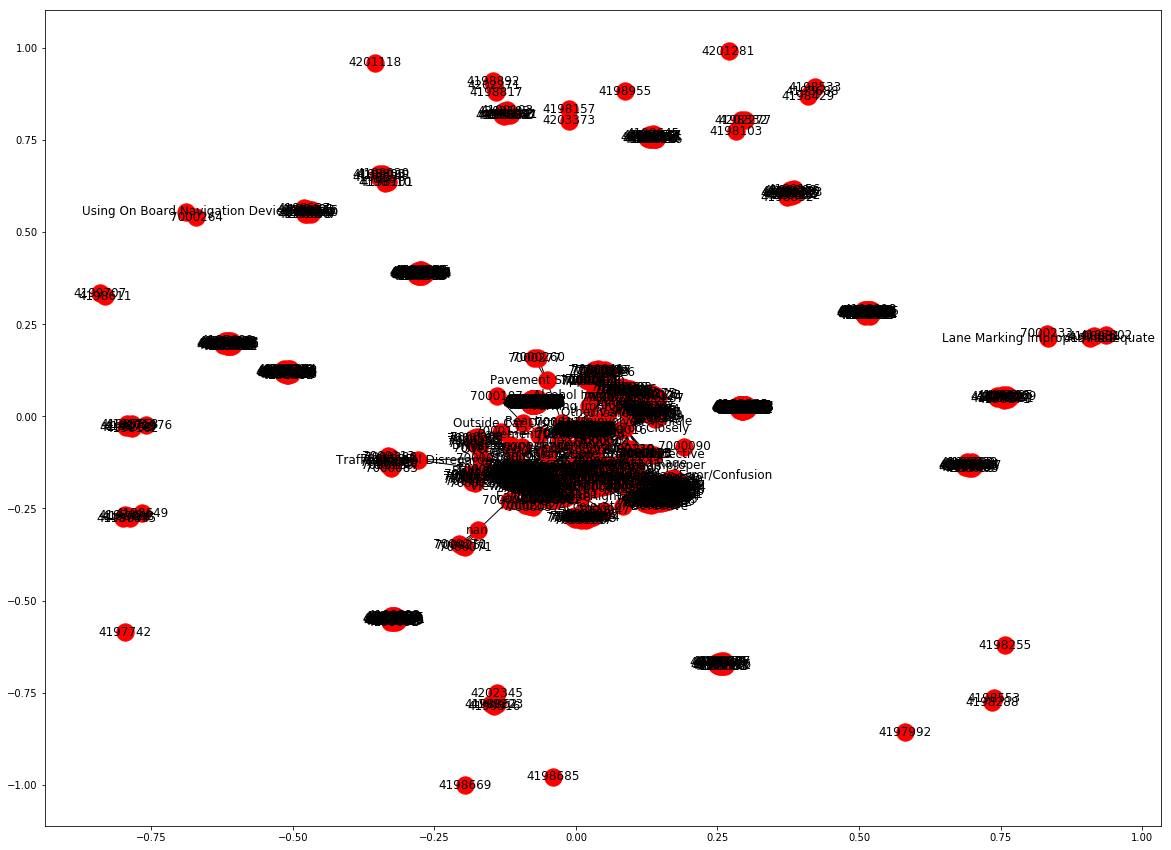

In [12]:
plt.figure(figsize=(20,15))
nx.draw_networkx(G)
plt.show()

# Analysis

AFter creating our graph, we finally calculated the centrality measures for the nodes in our graph.  Eigenvector centrality is a measure of centrality that takes into account the relative "influence" of neighboring nodes when determining the influence of any given node. This means that it  isn't about the # of connections a given node has, but the connections a given node has to well connected nodes. A high eigenvector score means being connected to more influential nodes.

Degree Centrality is simply a measure of the number of "degrees" a node has. A degree is an outside connection (an edge, linking the node to another node).

When looking at the results, the eigenvector scores seem to be either high or low, relative to where an accident took place.  

In [13]:
cf = pd.DataFrame()
cf['eig_centrality'] = nx.eigenvector_centrality(G).values()
cf['deg_centrality'] = nx.degree_centrality(G).values()
cf['bet_centrality'] = nx.betweenness_centrality(G).values()
cf['clo_centrality'] = nx.closeness_centrality(G).values()
cf.index = list(G)
cf

,eig_centrality,deg_centrality,bet_centrality,clo_centrality
4198311,7.738232e-02,0.180043,0.000000,0.180043
4199346,2.243933e-05,0.144252,0.000000,0.144252
4199361,2.078603e-34,0.022777,0.000000,0.022777
4197802,2.002713e-66,0.002169,0.000000,0.002169
4198430,2.243933e-05,0.144252,0.000000,0.144252
4198899,1.134670e-41,0.014100,0.000000,0.014100
4198431,7.738232e-02,0.180043,0.000000,0.180043
4198558,2.752508e-55,0.005423,0.000000,0.005423
4198690,7.312003e-43,0.013015,0.000000,0.013015
4198875,4.060613e-31,0.028200,0.000000,0.028200
